In [1]:
#Description: Tis program attempts to optimize a users portfolio using the Efficient Frontier and python

In [2]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock Symbols/tickers in the portfolio
#FAANG
assets=['META','AMZN','AAPL','NFLX','GOOG']

In [4]:
#Assign weights to the stocks.
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [5]:
#Get the Stock/portfolio starting date
stockStartDate='2013-01-01'
stockStartDate

'2013-01-01'

In [6]:
#Get the stock ending date(today)
today=datetime.today().strftime('%Y-%m-%d')
today

'2022-10-04'

In [7]:
datetime.today()

datetime.datetime(2022, 10, 4, 11, 54, 57, 420849)

In [8]:
#crreate a datframe to store the adjusted close price of the stock
df=pd.DataFrame()
#Store the adjusted Close price of the stock into the dataframe
for stock in assets:
    df[stock]=web.DataReader(stock,data_source='yahoo',start='2013-01-02',end=today)['Close']

In [9]:
#Show the df
df

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,12.865500,19.608213,13.144286,18.013729
2013-01-03,27.770000,12.924000,19.360714,13.798571,18.024191
2013-01-04,28.760000,12.957500,18.821428,13.711429,18.380356
2013-01-07,29.420000,13.423000,18.710714,14.171429,18.300158
2013-01-08,29.059999,13.319000,18.761070,13.880000,18.264042
...,...,...,...,...,...
2022-09-27,134.399994,114.410004,151.759995,224.360001,98.089996
2022-09-28,141.610001,118.010002,149.839996,245.199997,100.739998
2022-09-29,136.410004,114.800003,142.479996,239.710007,98.089996


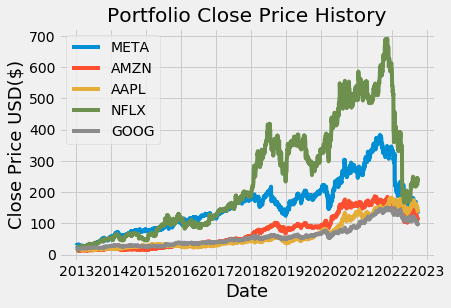

In [10]:
#Visually show the stock/portfolio
title='Portfolio Close Price History'
#Get the stock
my_stocks=df
#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='best')

In [11]:
#Show the daily simple return
returns=df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2022-09-27,-0.014446,-0.006426,0.006566,0.001294,-0.007287
2022-09-28,0.053646,0.031466,-0.012652,0.092886,0.027016
2022-09-29,-0.036721,-0.027201,-0.049119,-0.022390,-0.026305


In [12]:
#Create and show the annualize covariance matrix
Cov_matrix_annual=returns.cov()*252#random variables varries, directional movement of two asstes
Cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.135897,0.064511,0.050677,0.072617,0.058485
AMZN,0.064511,0.102753,0.045909,0.072645,0.053235
AAPL,0.050677,0.045909,0.082628,0.041432,0.042725
NFLX,0.072617,0.072645,0.041432,0.224677,0.054894
GOOG,0.058485,0.053235,0.042725,0.054894,0.070830


In [13]:
#Calculate the portfolio variance
port_variance=np.dot(weights.T,np.dot(Cov_matrix_annual,weights))
port_variance

0.06924182338508929

In [14]:
#calculate the portfolio volatility as known as deviation
port_volatility=np.sqrt(port_variance)
port_volatility

0.26313841107882613

In [15]:
#calculate the annual portfolio retrun
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.27485153185785766

In [16]:
#Show the expected annual return,volatility(risk) and variance
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'
percent_vols,percent_ret

('26.0%', '27.0%')

In [17]:
#!python -m pip install PyPortfolioOpt

In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [19]:
#Portfolio Optimization !
#Calculate the Expected return and the annualised sample covariance matrix of assets return
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)
#optimize for max sharpe ratio
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('META', 0.0), ('AMZN', 0.26972), ('AAPL', 0.42534), ('NFLX', 0.24577), ('GOOG', 0.05917)])
Expected annual return: 26.1%
Annual volatility: 26.6%
Sharpe Ratio: 0.91


(0.2608561001173964, 0.26554889285349836, 0.9070122549909301)

In [20]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_price=get_latest_prices(df)
weights=cleaned_weights
DiscreteAllocation(weights,latest_price,total_portfolio_value=15000)